In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import time
import planarity
from networkx.algorithms import community
# import make_mst
# import make_pmfg

In [2]:
#! todo need refixed 
# dist
def get_graph_dist(month):
    raw_data = pd.read_csv('cleaned_data.csv',index_col=0)
    one_month = raw_data[raw_data['month']==month]
    pivot_m = pd.pivot_table(data=one_month,values='return',columns='简称',index='日期')
    corr=pivot_m.corr()
    distance_m = np.sqrt(2*(1-corr))
    # corr = np.abs(corr)
    # print(corr)
    zipped = []
    for i in range(len(distance_m.columns)):
        zipped.append(list(zip([distance_m.columns[i]]*distance_m.shape[0],distance_m.index,distance_m[distance_m.columns[i]])))
    print(len(zipped)) # 123
    # print(zipped)
    List_flat = []
    for i in zipped:
        for j in i:
            if not np.isnan(j[2]):
                List_flat.append(j)
    s_List_flat = list(set(List_flat))
    print(len(s_List_flat)) # 15129

    List = []
    for i in range(len(s_List_flat)):
        # print(s_List_flat[i])
        if float(s_List_flat[i][2])!=0:
            List.append(s_List_flat[i])
    
    print(len(List)) # 7512
    # print(List)
    G = nx.Graph()
    node_list = list([x for x,y,z in s_List_flat])
    for i in range(len(node_list)):
        if one_month[one_month['简称']==node_list[i]].iloc[0]['subsector'] == '资本市场服务':
            G.add_node(node_list[i],color ='yellow')
        elif one_month[one_month['简称']==node_list[i]].iloc[0]['subsector'] == '保险业':
            G.add_node(node_list[i],color ='blue')
        elif one_month[one_month['简称']==node_list[i]].iloc[0]['subsector'] == '货币金融':
            G.add_node(node_list[i],color ='red')
        elif one_month[one_month['简称']==node_list[i]].iloc[0]['subsector'] == '其他金融业':
            G.add_node(node_list[i],color ='green')
    G.add_weighted_edges_from(List)
    return G

def sort_graph_edges_dist(G):
    sorted_edges = []
    tmp = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse = False)
    for source, dest, data in tmp: # in descending order!
        sorted_edges.append({'source': source,
                            'dest': dest,
                            'weight': data['weight']})
    return sorted_edges

def compute_PMFG(G):
    PMFG = nx.Graph() 
    ne_total = G.number_of_edges()
    nb_nodes = len(G.nodes)
    ne_pmfg = 3*(nb_nodes-2)
    sorted_edges = sort_graph_edges_dist(G)
    t0 = time.time()
    for i, edge in enumerate(sorted_edges):
        PMFG.add_edge(edge['source'], edge['dest'], weight = edge['weight'])
        if not planarity.is_planar(PMFG):
            PMFG.remove_edge(edge['source'], edge['dest'])
        ne = PMFG.number_of_edges()
        print("Generating PMFG... added edges in PMFG %d/%d (%.2f%%) lookup edges in G %d/%d (%.2f%%) Elapsed TIme %.2f [sec]"            %(ne, ne_pmfg, (ne/ne_pmfg)*100, i, ne_total, (i+1/ne_total)*100, time.time()-t0), end="\r")
        if ne == ne_pmfg:
            break
    return PMFG

123
15129
15006
# of nodes, 123
# of edges, 7503


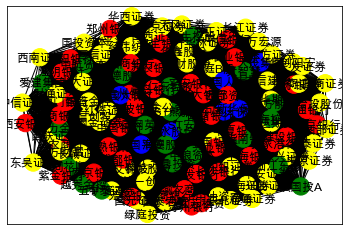

In [3]:
## corr 算法
month = '2020-11'
G1 = get_graph_dist(month)
color = []
color_map = dict(G1.nodes)
# print(color_map)
for node in color_map.items():
    # print(node)
    color.append(node[1]['color'])
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
# plt.figure(figsize=(10,8))
nx.draw_networkx(G1,node_color=color)
# G.edges(data=True)
# sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse = True)
print('# of nodes,', nx.number_of_nodes(G1))
print('# of edges,', nx.number_of_edges(G1))


In [4]:
d1 = dict(G1.degree)
# print(d1)
d_list1 = list(d1)
# print(len(d_list1))

{'太平洋': 122, '申万宏源': 122, '西安银行': 122, '北京银行': 122, '长江证券': 122, '中银证券': 122, '苏州银行': 122, '上海银行': 122, '青农商行': 122, '天风证券': 122, '中泰证券': 122, '中航资本': 122, '西水股份': 122, '杭州银行': 122, '仁东控股': 122, '国海证券': 122, '*ST熊猫': 122, '中国平安': 122, '第一创业': 122, '西南证券': 122, '兴业证券': 122, '经纬纺机': 122, '国信证券': 122, '华安证券': 122, '中国银河': 122, '国联证券': 122, '中原证券': 122, '宝德股份': 122, '山西证券': 122, '大智慧': 122, '张家港行': 122, '江苏银行': 122, '海通证券': 122, '同花顺': 122, '新力金融': 122, '海德股份': 122, '中油资本': 122, '交通银行': 122, '国金证券': 122, '五矿资本': 122, '方正证券': 122, '华泰证券': 122, '长城证券': 122, '中国银行': 122, '新华保险': 122, '东兴证券': 122, '哈投股份': 122, '浙商证券': 122, '工商银行': 122, '中信证券': 122, '广发证券': 122, '江苏租赁': 122, '建设银行': 122, '指南针': 122, '浙江东方': 122, '中国人保': 122, '光大银行': 122, '紫金银行': 122, '江阴银行': 122, '瑞达期货': 122, '越秀金控': 122, '泛海控股': 122, '招商证券': 122, '东方财富': 122, '厦门银行': 122, '财通证券': 122, '中金公司': 122, '西部证券': 122, '*ST安信': 122, '光大证券': 122, '华鑫股份': 122, '华西证券': 122, '天茂集团': 122, '绿庭B股': 122, '湘财股份': 122, '吉艾科技': 122, '招商银行': 122, 

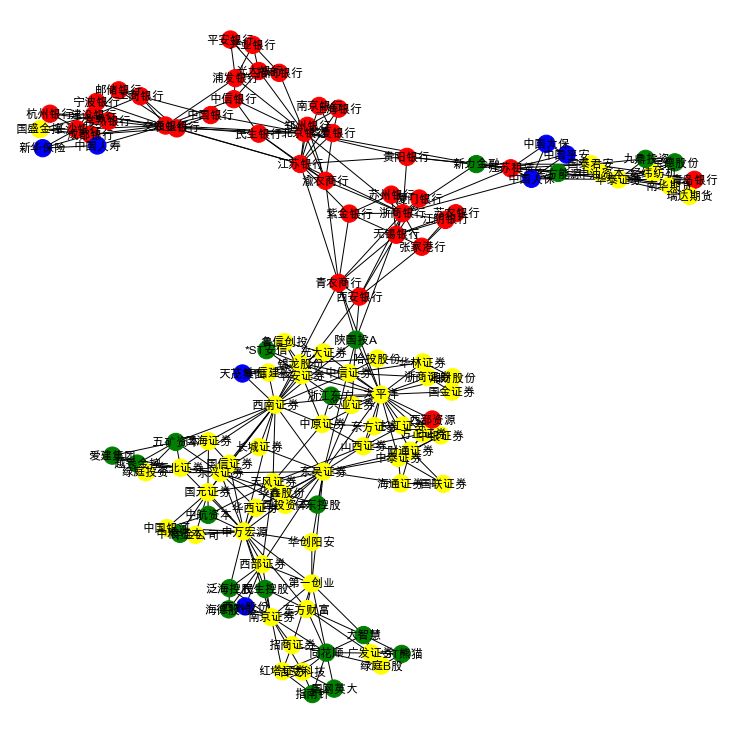

In [5]:

pfmg1 = compute_PMFG(G1)
node_list = list(pfmg1.nodes())
raw_data = pd.read_csv('cleaned_data.csv',index_col=0)
one_month = raw_data[raw_data['month']==month]
for i in range(len(node_list)):
    # print(node_list[i])
    if one_month[one_month['简称']==node_list[i]].iloc[0]['subsector'] == '资本市场服务':
        pfmg1.nodes[node_list[i]]['color'] ='yellow'
    elif one_month[one_month['简称']==node_list[i]].iloc[0]['subsector'] == '保险业':
        pfmg1.nodes[node_list[i]]['color'] ='blue'
    elif one_month[one_month['简称']==node_list[i]].iloc[0]['subsector'] == '货币金融':
        pfmg1.nodes[node_list[i]]['color'] ='red'
    elif one_month[one_month['简称']==node_list[i]].iloc[0]['subsector'] == '其他金融业':
        pfmg1.nodes[node_list[i]]['color'] ='green'
color = []
color_map = dict(pfmg1.nodes)
# print(color_map)
for node in color_map.items():
    color.append(node[1]['color'])
plt.figure(figsize=(10,10))
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
nx.draw_spring(pfmg1,with_labels=True,node_color = color)

# degree_centrality 

In [29]:
degree_centrality=nx.degree_centrality(pfmg1) 

degree_centrality_list= sorted(degree_centrality.items(),key=lambda x:x[1],reverse=True)

keys = [k[0] for k in degree_centrality_list]
values = [k[1] for k in degree_centrality_list]
# degree_centrality_list

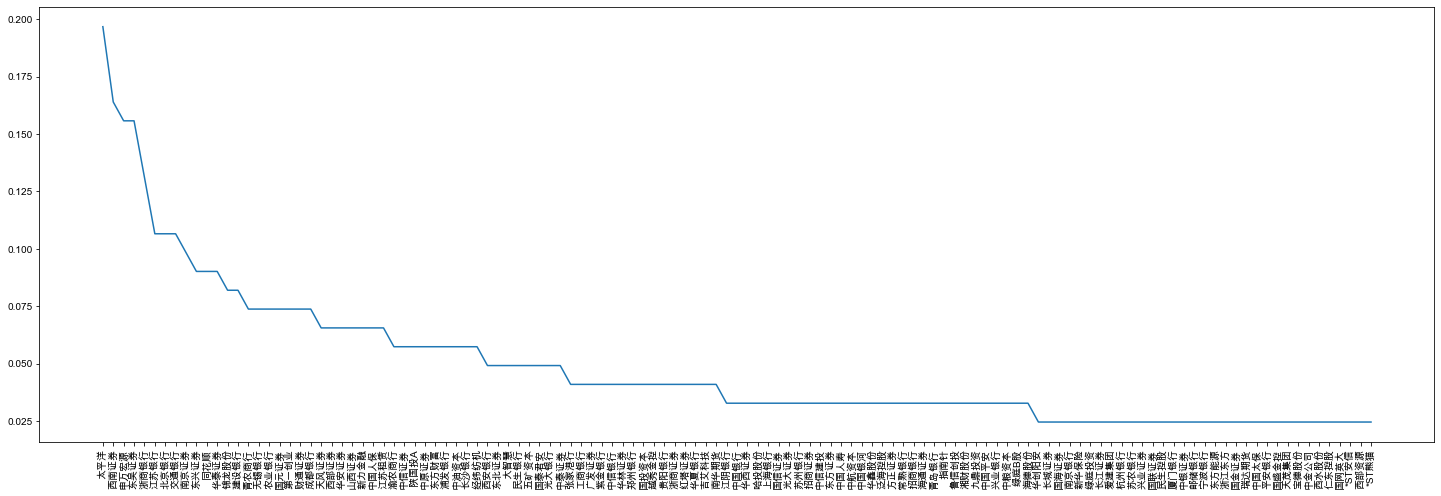

In [30]:
plt.figure(figsize=(25,8))
plt.xticks(rotation=90)
plt.plot(keys,values)


# betweenness_centrality

In [31]:
between_centrality=nx.betweenness_centrality(pfmg1) 

between_centrality_list= sorted(between_centrality.items(),key=lambda x:x[1],reverse=True)

keys = [k[0] for k in between_centrality_list]
values = [k[1] for k in between_centrality_list]

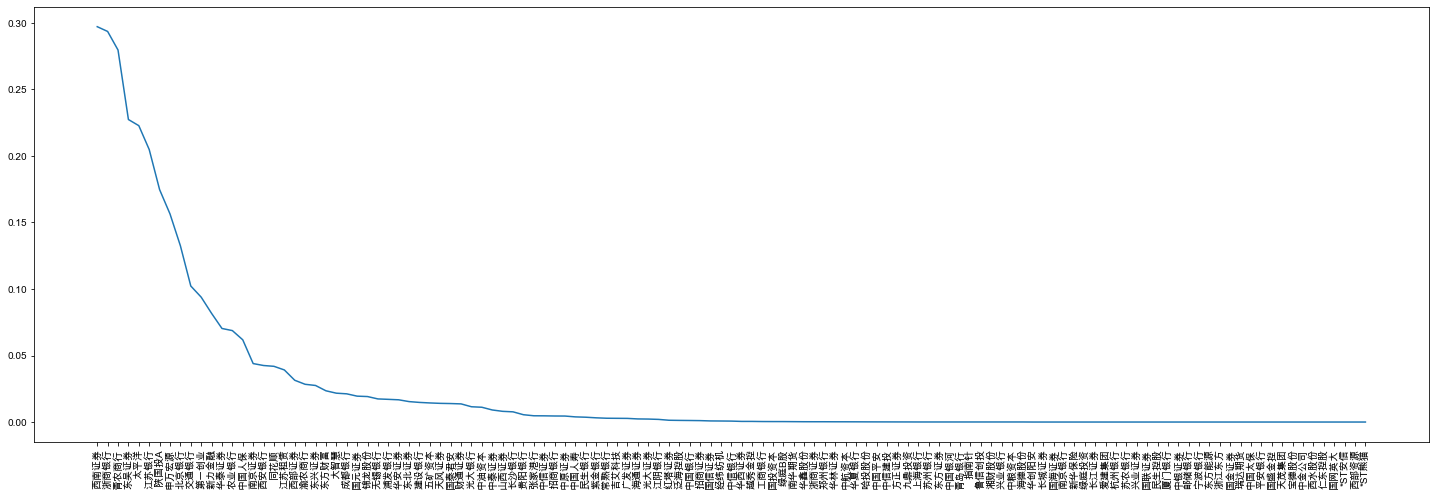

In [32]:
plt.figure(figsize=(25,8))
plt.xticks(rotation=90)
plt.plot(keys,values)

In [6]:
#todo need refixed 
def get_graph_corr(month):
    raw_data = pd.read_csv('cleaned_data.csv',index_col=0)
    one_month = raw_data[raw_data['month']==month]
    pivot_m = pd.pivot_table(data=one_month,values='return',columns='简称',index='日期')
    corr=pivot_m.corr()
    # distance_m = np.sqrt(2*(1-corr))
    # corr = np.abs(corr)
    # print(corr)
    zipped = []

    for i in range(len(corr.columns)):
        zipped.append(list(zip([corr.columns[i]]*corr.shape[0],corr.index,corr[corr.columns[i]])))
    print(len(zipped)) # 123
    List_flat = []
    for i in zipped:
        for j in i:
            if not np.isnan(j[2]):
                List_flat.append(j)
    s_List_flat = list(set(List_flat))
    print(len(s_List_flat)) # 15129

    List = []
    for i in range(len(s_List_flat)):
        # print(s_List_flat[i][2])
        if float(s_List_flat[i][2])!=1:
            List.append(s_List_flat[i])
    
    print(len(List)) # 15006
    # print(List)
    G = nx.Graph()
    node_list = list([x for x,y,z in s_List_flat])
    for i in range(len(node_list)):
        if one_month[one_month['简称']==node_list[i]].iloc[0]['subsector'] == '资本市场服务':
            G.add_node(node_list[i],color ='yellow')
        elif one_month[one_month['简称']==node_list[i]].iloc[0]['subsector'] == '保险业':
            G.add_node(node_list[i],color ='blue')
        elif one_month[one_month['简称']==node_list[i]].iloc[0]['subsector'] == '货币金融':
            G.add_node(node_list[i],color ='red')
        elif one_month[one_month['简称']==node_list[i]].iloc[0]['subsector'] == '其他金融业':
            G.add_node(node_list[i],color ='green')
    G.add_weighted_edges_from(List)
    return G

def sort_graph_edges_corr(G):
    sorted_edges = []
    tmp = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse = True)
    for source, dest, data in tmp: # in descending order!
        sorted_edges.append({'source': source,
                            'dest': dest,
                            'weight': data['weight']})
    return sorted_edges

def compute_PMFG(G):
    PMFG = nx.Graph() 
    ne_total = G.number_of_edges()
    nb_nodes = len(G.nodes)
    ne_pmfg = 3*(nb_nodes-2)
    sorted_edges = sort_graph_edges_corr(G)
    t0 = time.time()
    for i, edge in enumerate(sorted_edges):
        PMFG.add_edge(edge['source'], edge['dest'], weight = edge['weight'])
        if not planarity.is_planar(PMFG):
            PMFG.remove_edge(edge['source'], edge['dest'])
        ne = PMFG.number_of_edges()
        print("Generating PMFG... added edges in PMFG %d/%d (%.2f%%) lookup edges in G %d/%d (%.2f%%) Elapsed TIme %.2f [sec]"            %(ne, ne_pmfg, (ne/ne_pmfg)*100, i, ne_total, (i+1/ne_total)*100, time.time()-t0), end="\r")
        if ne == ne_pmfg:
            break
    return PMFG

123
15129
15006
# of nodes, 123
# of edges, 7503


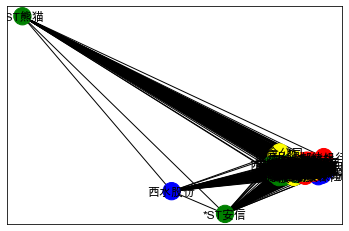

In [7]:
## corr 算法
month = '2020-11'
G2 = get_graph_corr(month)
color = []
color_map = dict(G2.nodes)
# print(color_map)
for node in color_map.items():
    # print(node)
    color.append(node[1]['color'])
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
# plt.figure(figsize=(10,8))
nx.draw_networkx(G2,node_color=color)
# G.edges(data=True)
# sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse = True)
print('# of nodes,', nx.number_of_nodes(G2))
print('# of edges,', nx.number_of_edges(G2))


In [8]:
d2= dict(G2.degree)
# print(d2)
d_list2 = list(d2)
print(len(d_list2))

123


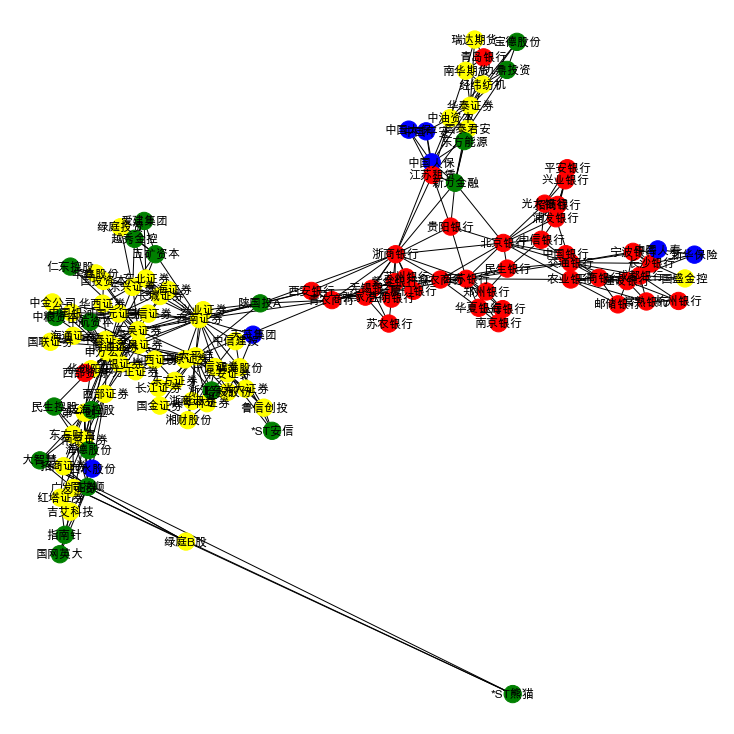

In [9]:

pfmg2 = compute_PMFG(G2)
node_list2 = list(pfmg2.nodes())
raw_data = pd.read_csv('cleaned_data.csv',index_col=0)
one_month = raw_data[raw_data['month']==month]
for i in range(len(node_list2)):
    # print(node_list[i])
    if one_month[one_month['简称']==node_list2[i]].iloc[0]['subsector'] == '资本市场服务':
        pfmg2.nodes[node_list2[i]]['color'] ='yellow'
    elif one_month[one_month['简称']==node_list2[i]].iloc[0]['subsector'] == '保险业':
        pfmg2.nodes[node_list2[i]]['color'] ='blue'
    elif one_month[one_month['简称']==node_list2[i]].iloc[0]['subsector'] == '货币金融':
        pfmg2.nodes[node_list2[i]]['color'] ='red'
    elif one_month[one_month['简称']==node_list2[i]].iloc[0]['subsector'] == '其他金融业':
        pfmg2.nodes[node_list2[i]]['color'] ='green'
color = []
color_map = dict(pfmg2.nodes)
# print(color_map)
for node in color_map.items():
    color.append(node[1]['color'])
plt.figure(figsize=(10,10))
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
nx.draw_spring(pfmg2,with_labels=True,node_color = color)